# Symmetric vs asymmetric parcellation


In [1]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
from Functional_Fusion.dataset import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt



/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Flatmap of symmetric vs asymmetric parcellation
Asymmetric parcellation was generated by freezing the emission models of the symmetric 68 parcellation and fitting an asymmetric arrangement model

In [2]:
figsize = (20, 20)
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(lut_dir +
                              'sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68.lut')
models = [
    'Models_03/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68',
    'Models_03/asym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_arrange-asym_sep-hem']

model_pair = ['Models_03/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_reordered',
              'Models_03/asym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_arrange-asym_sep-hem_reordered']


# Comparing asym with sym
Using ARI and voxel matching

### Group Parcellation

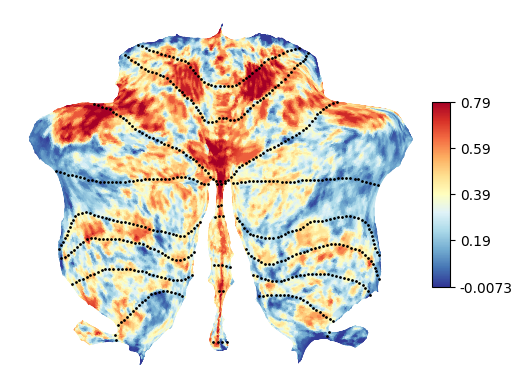

Text(0.5, 1.0, 'Adjusted Rand Index')

In [ ]:
# --- ARI ---
# Compute adjusted rand index of each voxel
ari, ari_group, ax = eva.compare_voxelwise(
    model_pair[0], model_pair[1], plot=True, method='ari')

ax.set_title('Adjusted Rand Index')




In [3]:
print(f'ARI range: {ari.min()} - {ari.max()}')


ARI range: -0.06843094527721405 - 0.7919145226478577


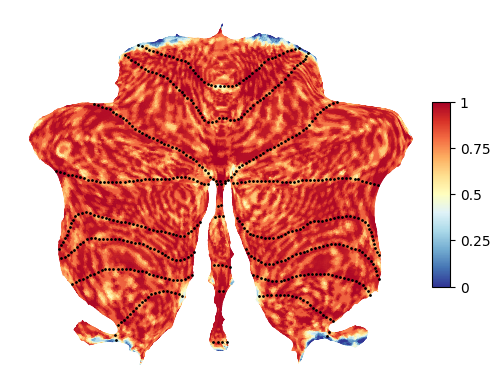

Text(0.5, 1.0, 'Rand Index')

In [9]:
ri, ax = eva.compare_voxelwise(
    model_pair[0], model_pair[1], plot=True, method='ri', lim=(0, 1))
ax.set_title('Rand Index')


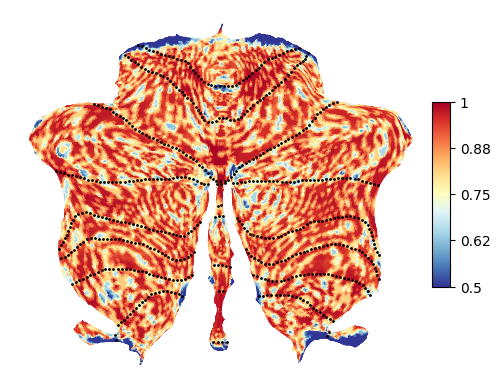

In [26]:

plt.figure()
ax = ut.plot_data_flat(ri, 'MNISymC2',
                       dtype='func',
                       render='matplotlib',
                       cmap='RdYlBu_r',
                       cscale=[0.5, 1],
                       colorbar=True)
plt.show()


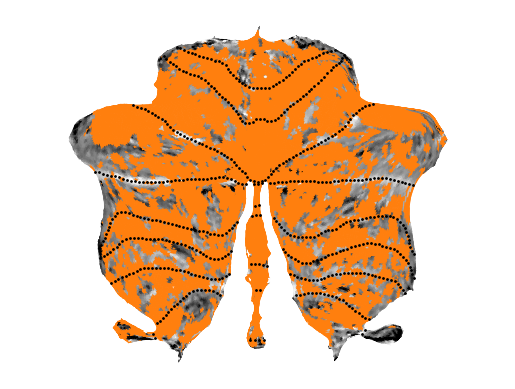

Text(0.5, 1.0, 'Match')

In [11]:
# --- Match ---
# Compute how many voxels land in the same parcel

match, ax = eva.compare_voxelwise(
    model_pair[0], model_pair[1], plot=True, method='match')
ax.set_title('Match')


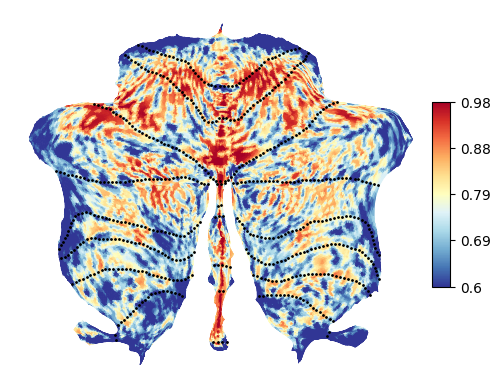

Text(0.5, 1.0, 'Correlation')

In [12]:
corr, ax = eva.compare_voxelwise(
    model_pair[0], model_pair[1], plot=True, method='corr')
ax.set_title('Correlation')


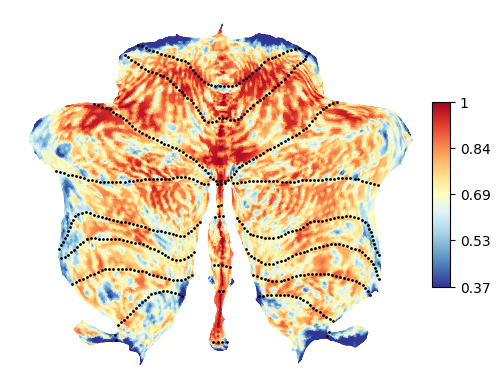

In [24]:
# Replot with limits of 0.5 to 1
plt.figure()
ax = ut.plot_data_flat(corr, 'MNISymC2',
                       dtype='func',
                       render='matplotlib',
                       cmap='RdYlBu_r',
                       cscale=[0.37, 1],
                       colorbar=True)
plt.show()


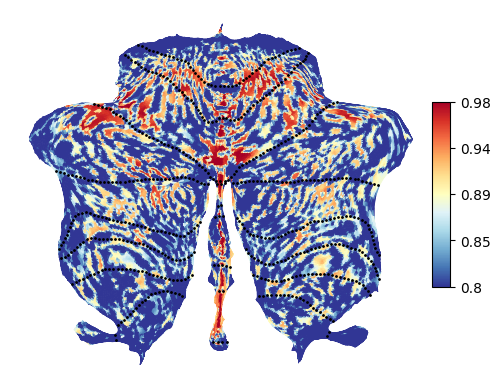

Text(0.5, 1.0, 'Cosine Angle')

In [14]:
cosang, ax = eva.compare_voxelwise(
    model_pair[0], model_pair[1], plot=True, method='cosang')
ax.set_title('Cosine Angle')


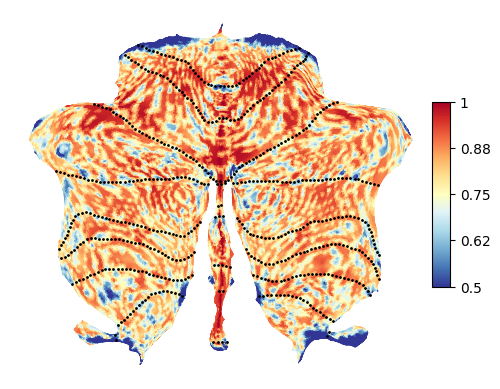

In [15]:
# Replot with limits of 0.5 to 1
plt.figure()
ax = ut.plot_data_flat(cosang, 'MNISymC2',
                       dtype='func',
                       render='matplotlib',
                       cmap='RdYlBu_r',
                       cscale=[0.5, 1],
                       colorbar=True)
plt.show()


### Individual Parcellation

In [14]:
# prob_a = ev.parcel_individual(model_pair[0])
# prob_b = ev.parcel_individual(model_pair[1])

# load Uhats
prob_a = pt.load(f'{ut.model_dir}/Models/{model_pair[0]}_Uhat.pt')
prob_b = pt.load(f'{ut.model_dir}/Models/{model_pair[1]}_Uhat.pt')

parcel_a = pt.argmax(prob_a, dim=1)
parcel_b = pt.argmax(prob_b, dim=1)


In [22]:
parcel_a.shape

torch.Size([111, 18290])

In [25]:
_, cmap_reordered, labels_reordered = nt.read_lut(lut_dir +
                              'sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_reordered.lut')
subject_labels = [f'Subject {i}' for i in range(1, parcel_b.shape[0] + 1)]


<AxesSubplot: title={'center': 'Subject 4'}>

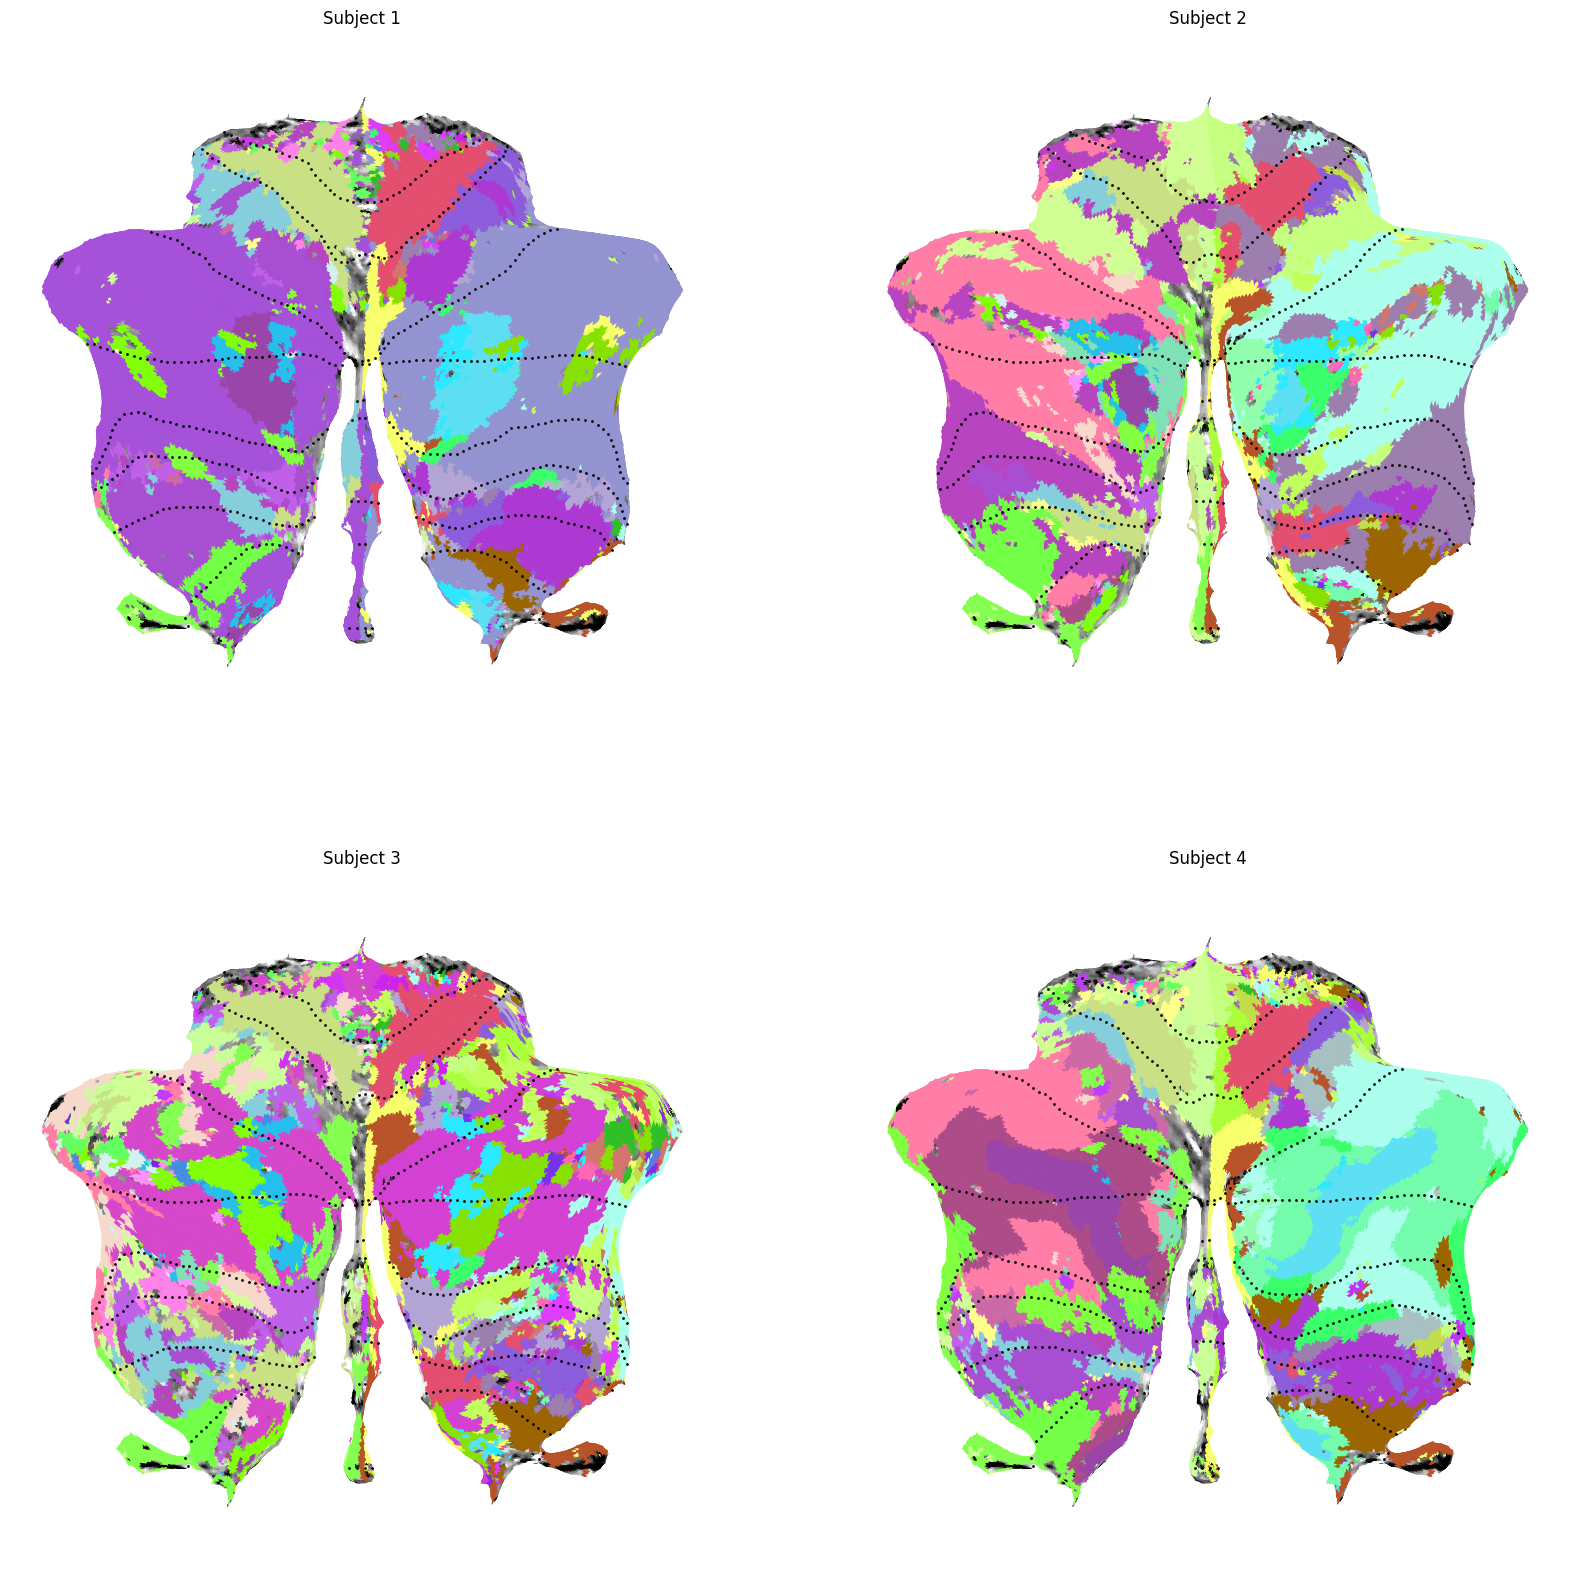

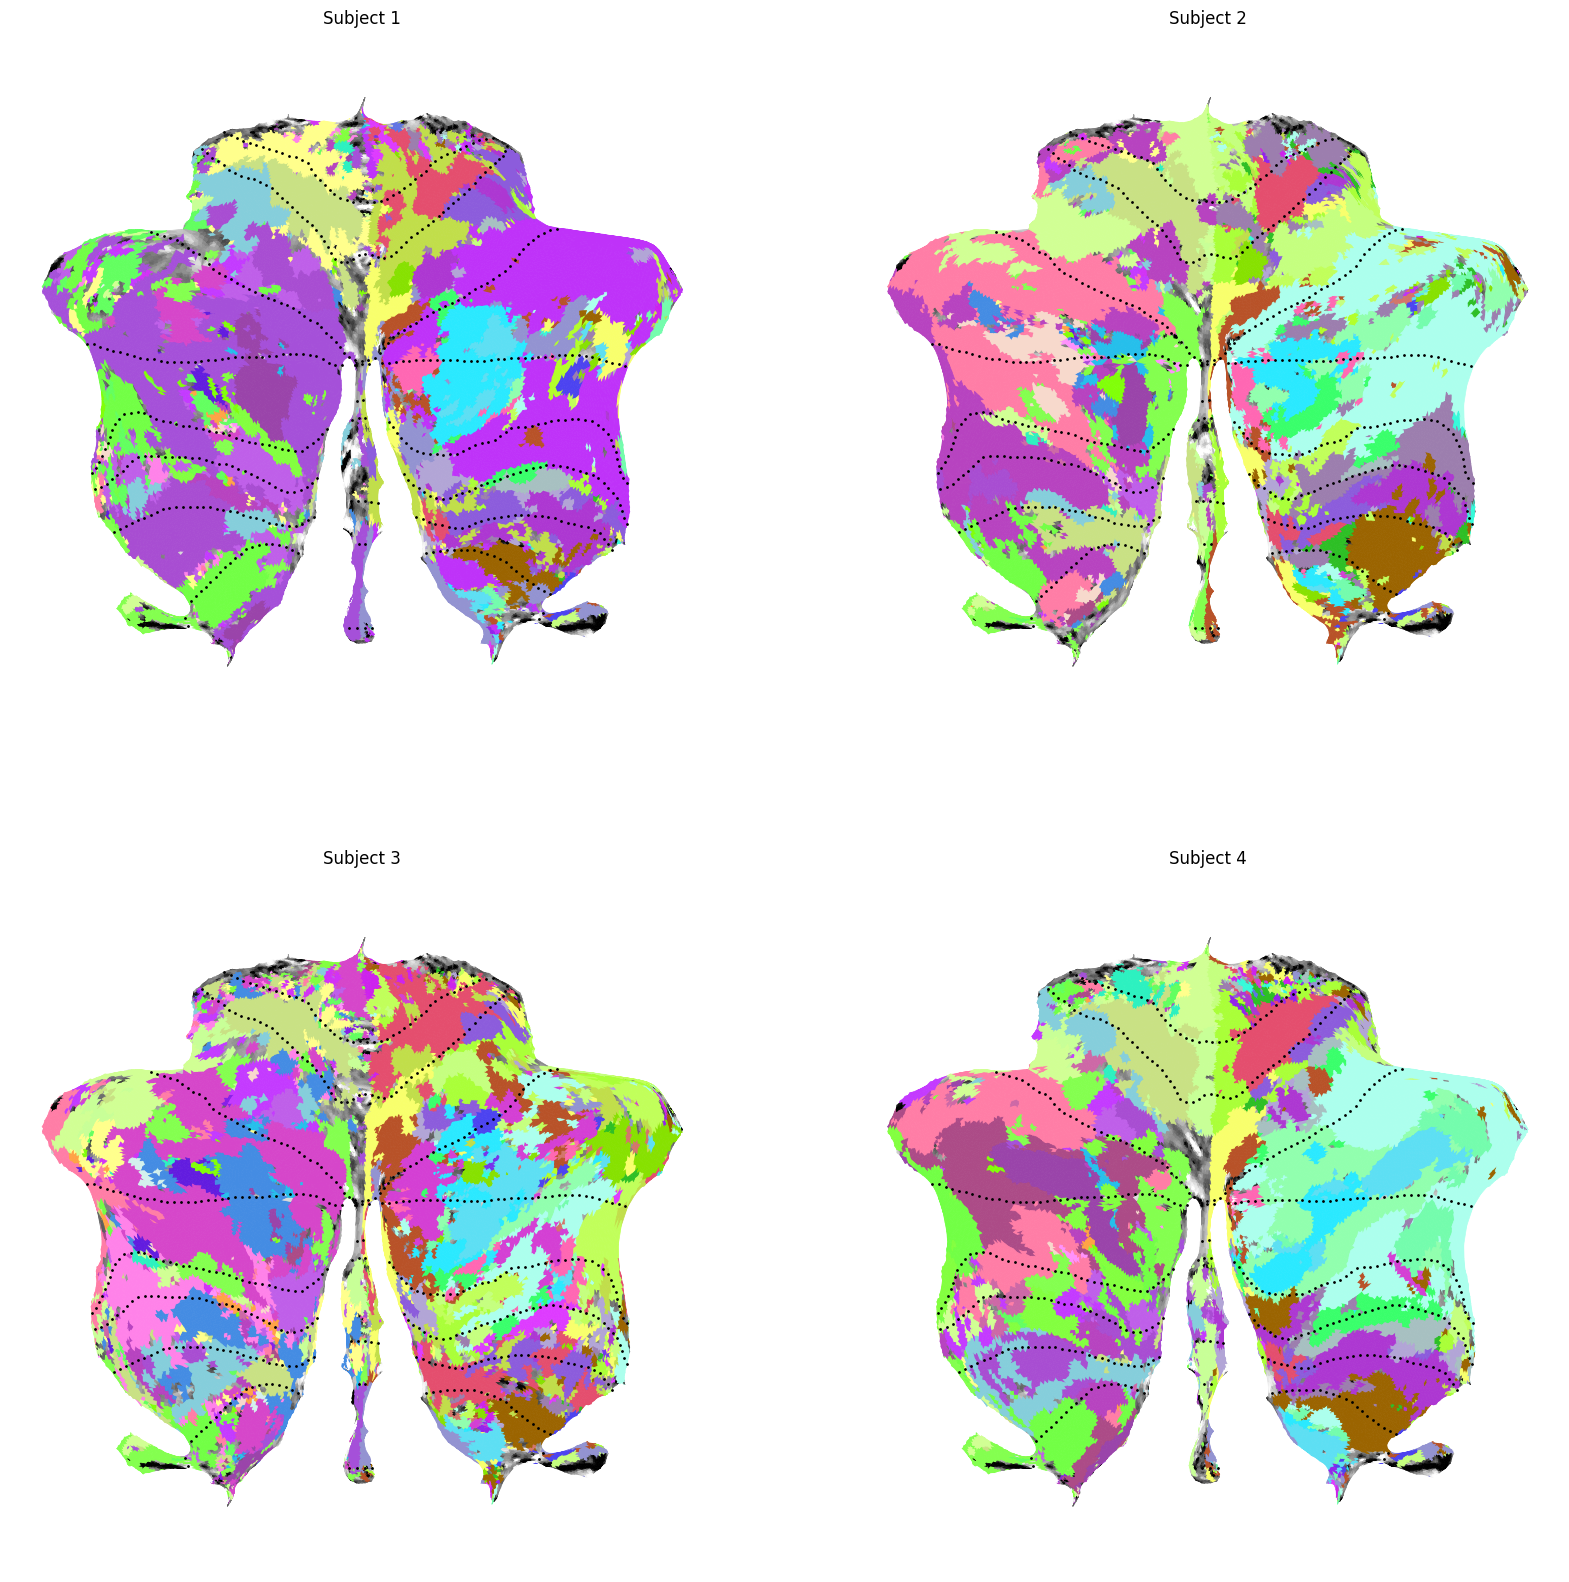

In [27]:
plt.figure(figsize=(20, 20))
# Make first 25 rows into list of 25 entries
parcel_a_list = [parcel_a[i, :] for i in range(parcel_a.shape[0])]
ut.plot_multi_flat(parcel_a_list[:4], 'MNISymC2',
                   grid=(2, 2),
                   dtype='label',
                   colorbar=False,
                   cmap=cmap_reordered,
                   titles=subject_labels[:4])

plt.figure(figsize=(20, 20))
parcel_b_list = [parcel_b[i, :] for i in range(parcel_b.shape[0])]
ut.plot_multi_flat(parcel_b_list[:4], 'MNISymC2',
                   grid=(2, 2),
                   dtype='label',
                   colorbar=False,
                   cmap=cmap_reordered,
                   titles=subject_labels[:4])


In [28]:
ari, ari_group = ev.ARI_voxelwise(
    parcel_a, parcel_b)


Computing ARI for individual 0...
Computing ARI for individual 1...
Computing ARI for individual 2...
Computing ARI for individual 3...
Computing ARI for individual 4...
Computing ARI for individual 5...
Computing ARI for individual 6...
Computing ARI for individual 7...
Computing ARI for individual 8...
Computing ARI for individual 9...
Computing ARI for individual 10...
Computing ARI for individual 11...
Computing ARI for individual 12...
Computing ARI for individual 13...
Computing ARI for individual 14...
Computing ARI for individual 15...
Computing ARI for individual 16...
Computing ARI for individual 17...
Computing ARI for individual 18...
Computing ARI for individual 19...
Computing ARI for individual 20...
Computing ARI for individual 21...
Computing ARI for individual 22...
Computing ARI for individual 23...
Computing ARI for individual 24...
Computing ARI for individual 25...
Computing ARI for individual 26...
Computing ARI for individual 27...
Computing ARI for individual 2

AttributeError: 'tuple' object has no attribute 'numpy'

In [ ]:
dtype = 'func'
cmap = 'RdYlBu_r'
labels = None,
colorbar = True
plt.figure()
ax = ut.plot_data_flat(ari, atlas,
                       dtype=dtype,
                       render='matplotlib',
                       cmap=cmap,
                       labels=labels,
                       colorbar=colorbar)
plt.show()

In [ ]:
ri, ri_group = ev.ARI_voxelwise(
    parcel_a, parcel_b, adjusted=True)


In [ ]:
dtype = 'func'
cmap = 'RdYlBu_r'
labels = None,
colorbar = True
plt.figure()
ax = ut.plot_data_flat(ri, atlas,
                       dtype=dtype,
                       render='matplotlib',
                       cmap=cmap,
                       labels=labels,
                       colorbar=colorbar)
plt.show()


In [33]:
corr, corr_group = ev.compare_probs(
    prob_a, prob_b, method='corr')


RuntimeError: The size of tensor a (56) must match the size of tensor b (55) at non-singleton dimension 0

In [31]:
dtype = 'func'
cmap = 'RdYlBu_r'
labels = None,
colorbar = True
plt.figure()
ax = ut.plot_data_flat(corr, atlas,
                       dtype=dtype,
                       render='matplotlib',
                       cmap=cmap,
                       labels=labels,
                       colorbar=colorbar)
plt.show()


NameError: name 'corr' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:

cosang, cosang_group = ev.compare_probs(
    prob_a, prob_b, method='cosang')


In [ ]:
dtype = 'func'
cmap = 'RdYlBu_r'
labels = None,
colorbar = True
plt.figure()
ax = ut.plot_data_flat(cosang, atlas,
                       dtype=dtype,
                       render='matplotlib',
                       cmap=cmap,
                       labels=labels,
                       colorbar=colorbar)
plt.show()


In [ ]:
# Save the results


In [30]:
# Compare results by dataset
info_a, model_a = ut.load_batch_best(model_pair[0])
info_a = ut.recover_info(info_a)

AttributeError: 'NoneType' object has no attribute 'emissions'

In [ ]:
info_a.datasets

infos = []
for dataset in info_a.datasets:
    print(dataset)
    _, _, info = get_dataset(ut.base_dir, dataset, info_only=True)
    print(info)
    infos.append(info)

# infos = [ _, _, info = get_dataset(ut.base_dir, dataset, info_only=True) for dataset in info_a.datasets ]
